In [11]:
%matplotlib inline

# Visualization Techniques in ModelFlow

Upon solving a model in ModelFlow, the outcome are stored  within Pandas dataframes. This document offers an  overview of various 
methodologies for visualizing these results. Within the ecosystem of Python, there exists a plethora of charting libraries, notable examples being [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/), and [bokeh](https://bokeh.org/). These libraries are well-integrated with dataframes, offering seamless interaction.

While users are free to employ any Python-based library for visualization purposes, it is important to note that **ModelFlow furnishes a suite of functions specifically designed for charting results**. These functions are uniquely tailored to comprehend and utilize metadata such as variable descriptions and transformations (like growth rates), which are useful in the analysis of model results.


## Enhancing ModelFlow Charts for Publication

The charts generated by ModelFlow methods like `keep_plot()` or `.plot()` are functional and adequate for basic analysis. However, they might not always meet the high-quality standards required for inclusion in publications or reports. The good news is that these charts are not static; they are highly customizable. Users have the flexibility to modify and enhance these charts, creating more impactful visualizations. Additionally, these refined charts can be saved in various formats, making them suitable for both online and print publications.

It's important to note that the plots produced by ModelFlow are essentially built on the matplotlib package. This means all the functionality of matplotlib is inherently available in ModelFlow. This allows for extensive customization of the standard graphs produced by ModelFlow, leveraging the robust capabilities of matplotlib.

While this chapter provides an introduction to some of matplotlib's features, it barely scratches the surface of what's possible. For those looking to dive deeper and explore the full range of options, the [matplotlib reference](https://matplotlib.org/stable/api/index.html) and numerous guides online can provide useful inspiration.


In [12]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')


In [ ]:
# Prepare the notebook for use of modelflow 

# Jupyter magic command to improve the display of charts in the Notebook
%matplotlib inline

# Import pandas 
import pandas as pd

# Import the model class from the modelclass module 
from modelclass import model 

# functions that improve rendering of modelflow outputs
model.widescreen()
model.scroll_off();

<IPython.core.display.Javascript object>

In order to manipulate plots later on matplotlib.pyplot is also imported. 

In [ ]:
import matplotlib.pyplot as plt # To manipulate plots 

## Two results soring systems  


When comparing results the user can take the result dataframe from two (or more)  simulation and use python do the necessary calculations and visualizations. However Modelflow provides some properties and methods which 
facilitates comparing more "out of the box". 

For more how results are stored in instances of the model class please look [here](Saving-results=)

A model instance (in this case  `mpak` provides two  "systems" to do this. The 
 1. **.basedf and .lastdf** dataframes. Which contains the first and the last solution of the model
 2. **.keep_solution** dictionary of dataframes. This is typical used when comparing several scenarios. 
 
### .basedf and .lastdf
In the example above there two dataframes with results ```baseline``` and ```scenario```. These dataframes can be manipulated and visualized
with the tools provided by the **pandas** library and other like **Matplotlib** and **Plotly**. However to make things easy the first and
latest simulation result is also in the mpak object:

- **mpak.basedf**: Dataframe with the values for baseline
- **mpak.lastdf**: Dataframe with the values for alternative  

This means that .basedf and .lastdf will contain the same result after the first simulation. <br>
If new scenarios are simulated the data in .lastdf will then be replaced with the latest results.

These dataframes are used by a number of model instance methods as you will see later.  

The user can assign dataframes to both .basedf and .lastdf. This is useful for comparing simulations which are not the first and last. 

### keep=\<Description>, create a  dictionary of dataframes from scenarios
Sometimes we want to be able to compare more than two scenarios. Using ```keep='some description'``` the dataframe with results can be saved into a dictionary with the description as key and the dataframe as value.  

mpak(<dataframe>,,keep=\<description>,,) 

The name of the dictionary will be mpak.keep_solutions

#### .keep_variables= \<selection string of variables>, Select variables to keep 
A modelinstance with many variables and/or many scenarios to keep can become very large. Therefor it can be useful not to keep all variables but to select a the variables which are needed. 

#### .keep_solutions = {}, resetting the .keep_solution 
Sometime it can be useful to reset the ```.keep_solutions```, so that a new set of solutions can be inspected. This is done by replacing it with an empty dictionary.

## Load a model

In [ ]:
mpak,baseline = model.modelload('../models/pak.pcim',run=1,start=2023,end=2040)

file read:  C:\mflow\papers\mfbook\content\models\pak.pcim


Now: 
 1. The model is solved for the time frame specified  
 2. The results are placed in **mpak.basedf** as it is the first time the model is solved. It is done explicit 
 3. The result is placed in **mpak.lastdf** as it is the last solution of the model 
 4. The result is placed in the dictionary **mpak.keep_solutions** with the key: **'baseline'** 


## Create scenarios/experiments

In [17]:
for oilshock in [10, 20 , 30]:
    print(f'Simulate oil shock: {oilshock}')
    oilshockdf = baseline.upd(f'<2025 2100> WLDFCRUDE_PETRO + {oilshock}')
    tempdf = mpak(oilshockdf,silent=1,keep=f'Oilshock =  {oilshock}') 

Simulate oil shock: 10
Simulate oil shock: 20
Simulate oil shock: 30


In the cell above:
1. The model is solved for each oil price shock.
2. The results for an oil price shock of 30 are stored in **mpak.lastdf**, as this represents the latest solution of the model.
3. These results are then added to the dictionary **mpak.keep_solutions**. Now, this dictionary contains the following keys: `['baseline', 'Oilshock = 10', 'Oilshock = 20', 'Oilshock = 30']`, with each key corresponding to a dataframe that contains the relevant results.


## Visualize with `.keep_plot` and its twin: `df_plot`
These two functions perform exactly the same. 
 - `.df_plot` uses .basedf and .lastdf
 - `.keep_plot` uses the dataframes in ´.keep_solutions´

In [18]:
lookat = 'PAKNYGDPMKTPKN PAKNEIMPGNFSKN  PAKCCEMISCO2TKN'

### `showtype` Type of data transformation for plotting ('level', 'growth', 'change'). Defaults to 'level'.


In [10]:
mpak.keep_plot(pat=lookat,samefig=1,legend=1,ncol=2,keep_dim=1,diff=1)

TypeError: Display_Mixin.keep_plot() got an unexpected keyword argument 'samefig'

### Save plots as files. 
The `.savefigs` function is used to save the plots for publication or other later use: 

The default location is `/graph`. `xopen=True` indicates that the output files are open in the browser. If that is not useful, just set xopen to False

In [ ]:
mpak.savefigs(figdict1,extensions=['pdf','png'],xopen=True)

### Growth rates `showtype='growth'`

In [ ]:
mpak.keep_plot(pat='PAKNEIMPGNFSKN',showtype='level',legend=0,start_ofset = -4,diffpct=1);

### Yearly changes ´showtype='changes'´

In [ ]:
for showtype in ('level', 'growth', 'change'):
    mpak.keep_plot('PAKCCEMISCO2TKN',showtype=showtype)

### `diffpct` If True, shows the percentage difference relative to the first experiment

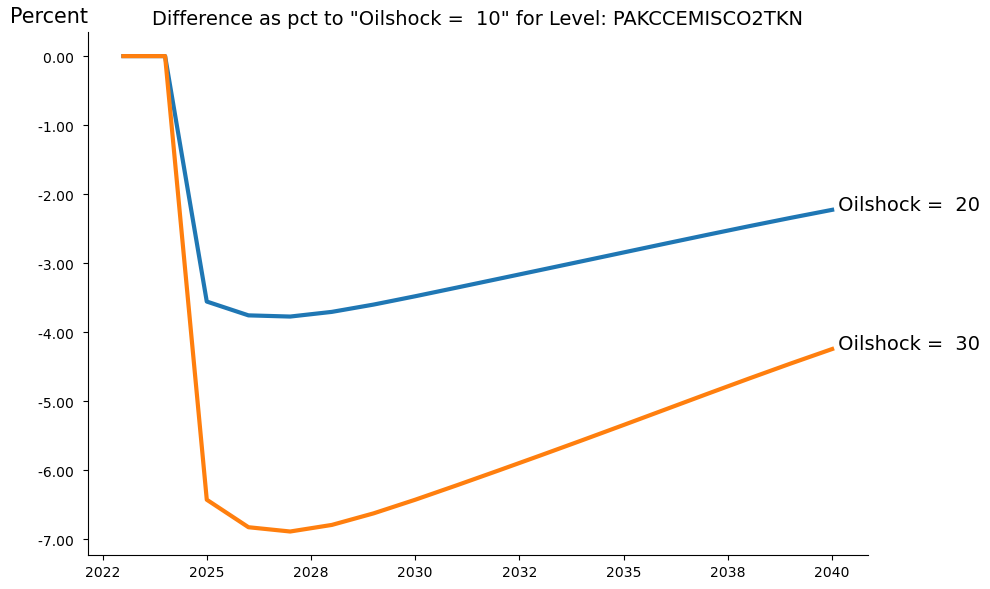

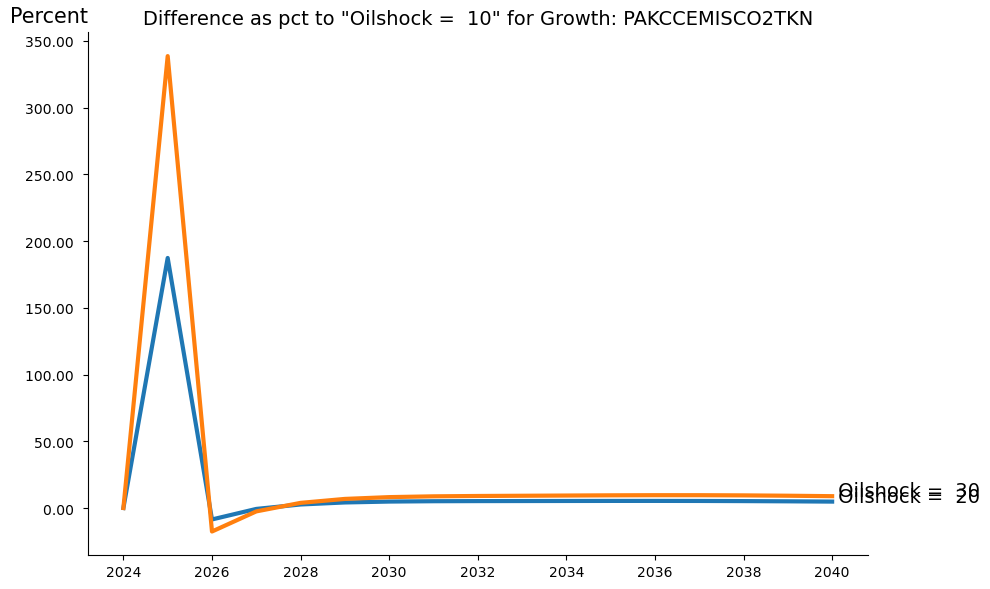

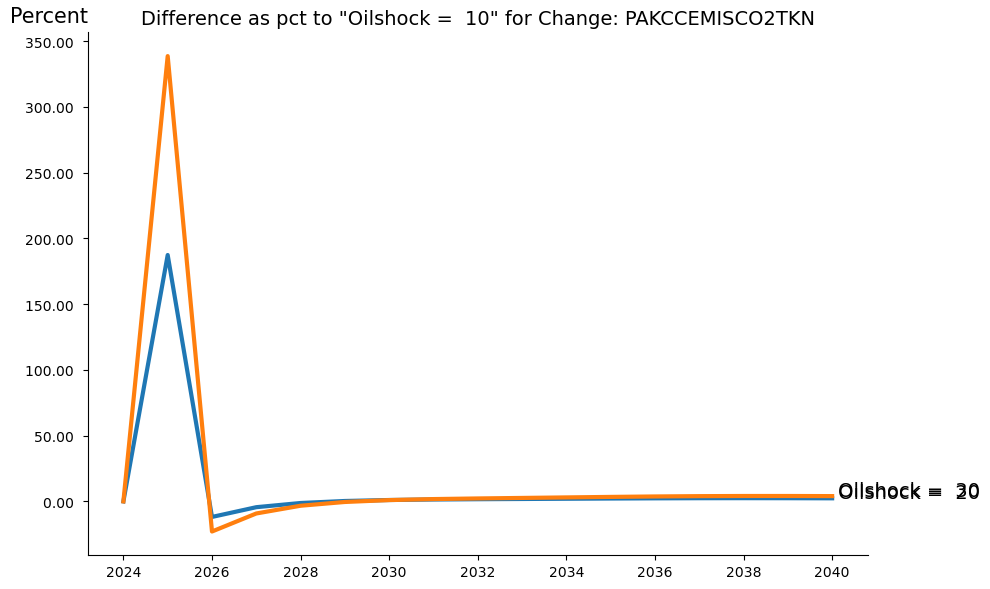

In [10]:
for showtype in ('level', 'growth', 'change'):
    mpak.keep_plot('PAKCCEMISCO2TKN',showtype=showtype,diffpct=True)

### `diff` If True, shows the difference relative to the first experiment

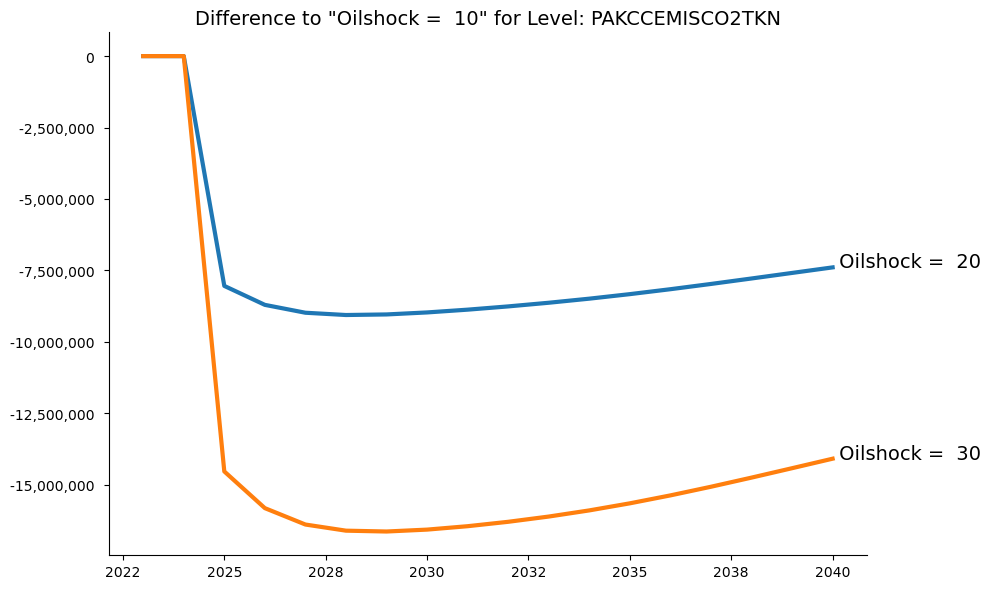

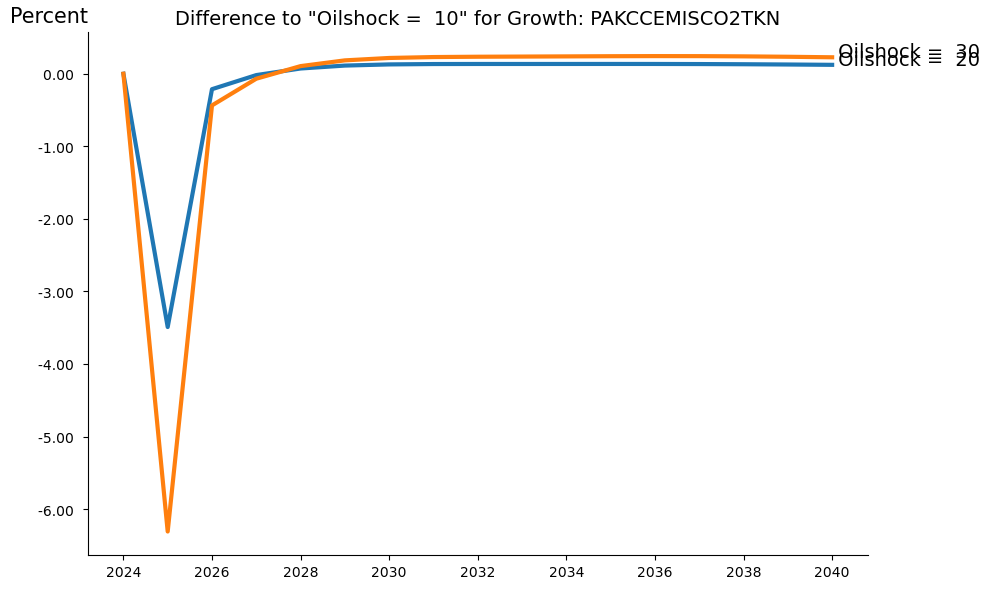

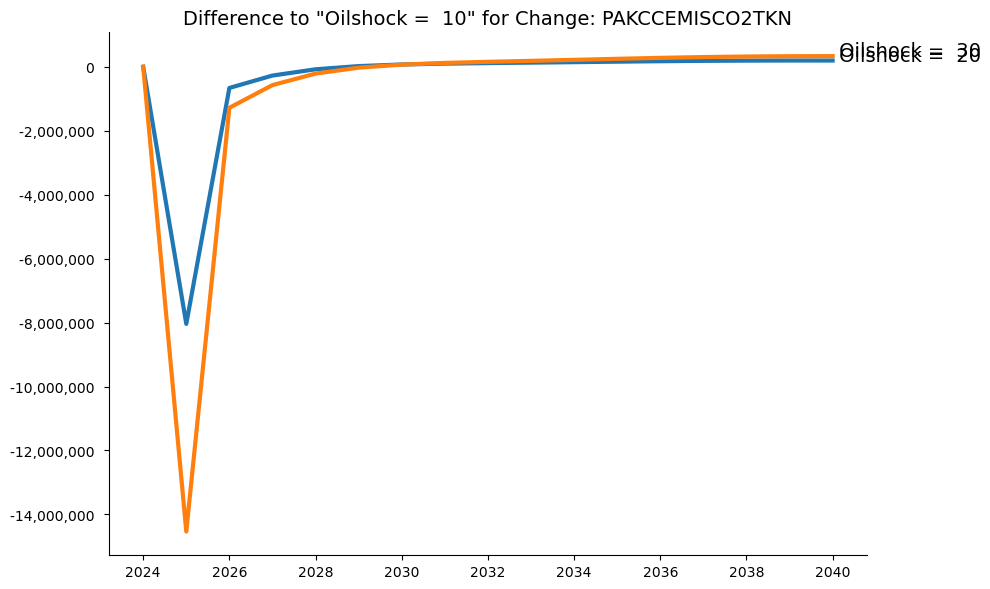

In [11]:
for showtype in ('level', 'growth', 'change'):
    mpak.keep_plot('PAKCCEMISCO2TKN',showtype=showtype,diff=True)

### `samefig`. If True, all plots are displayed in the same figure.
One matplot figure can contain several charts. This is governed by the `samefig`
parameter.

Example below: 

### 'keep_dim'  If True, each line represents a scenario, else each line represen
ts a variable.
So lets look at variables: 

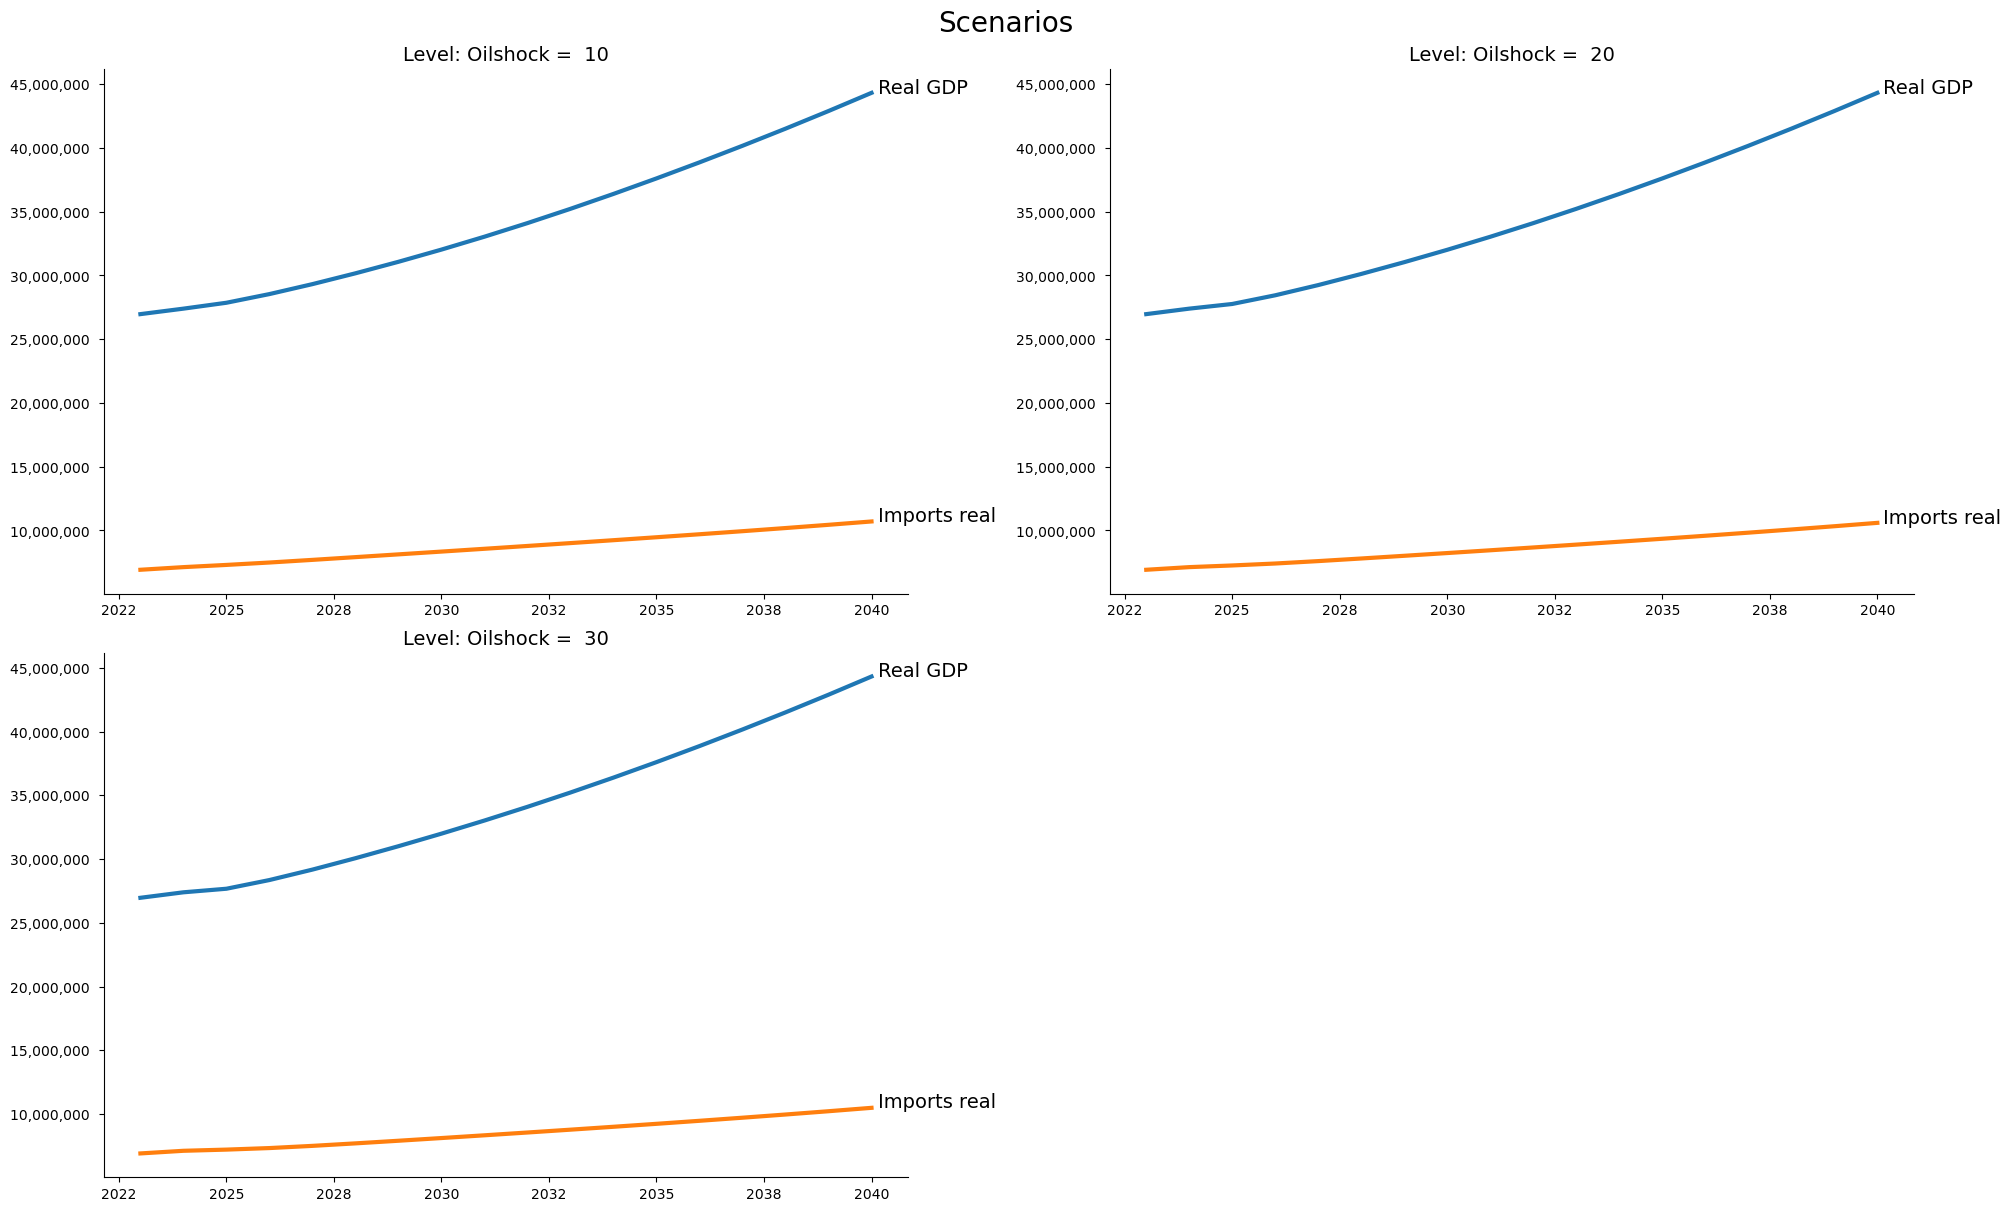

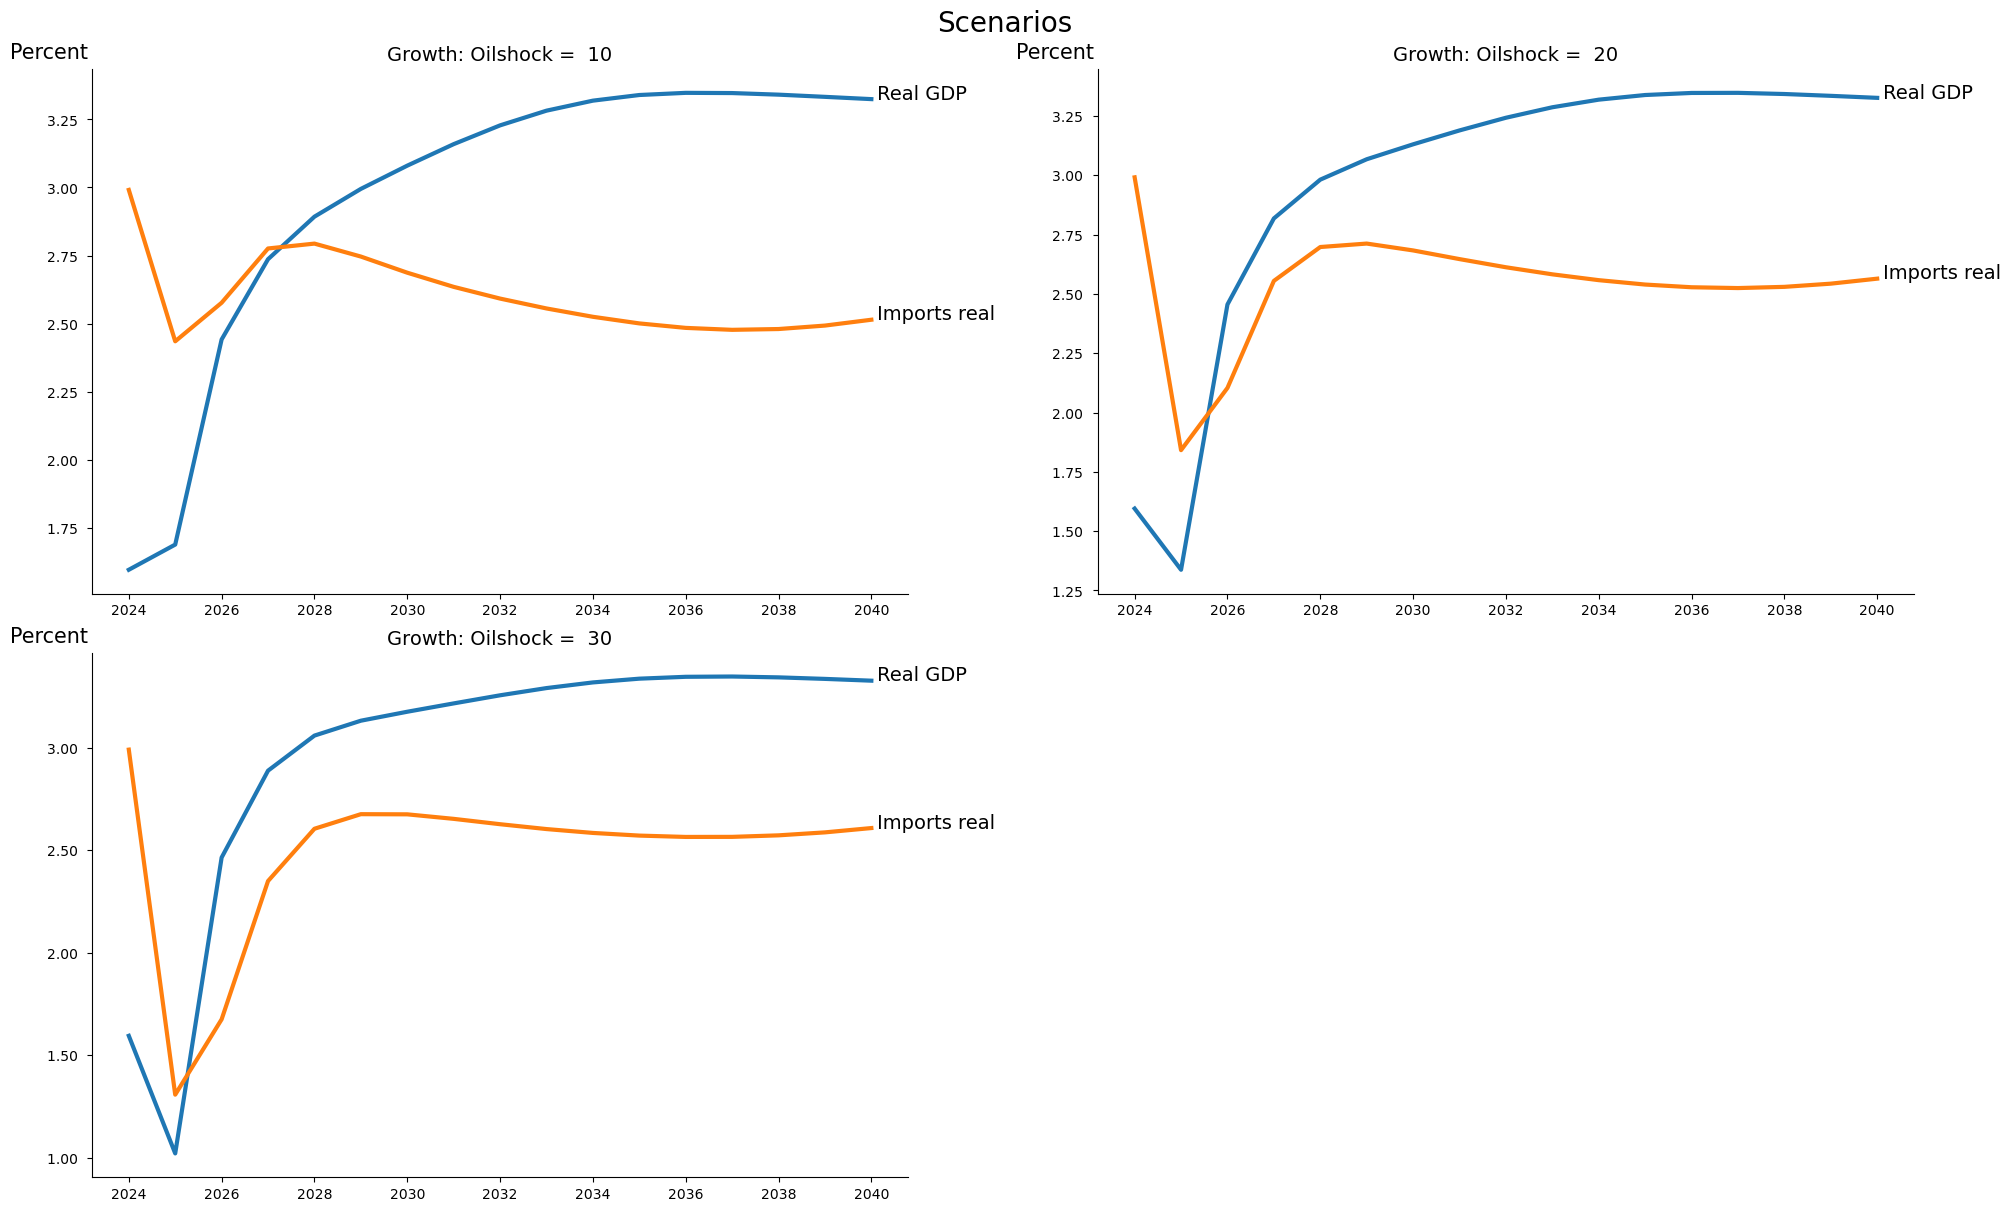

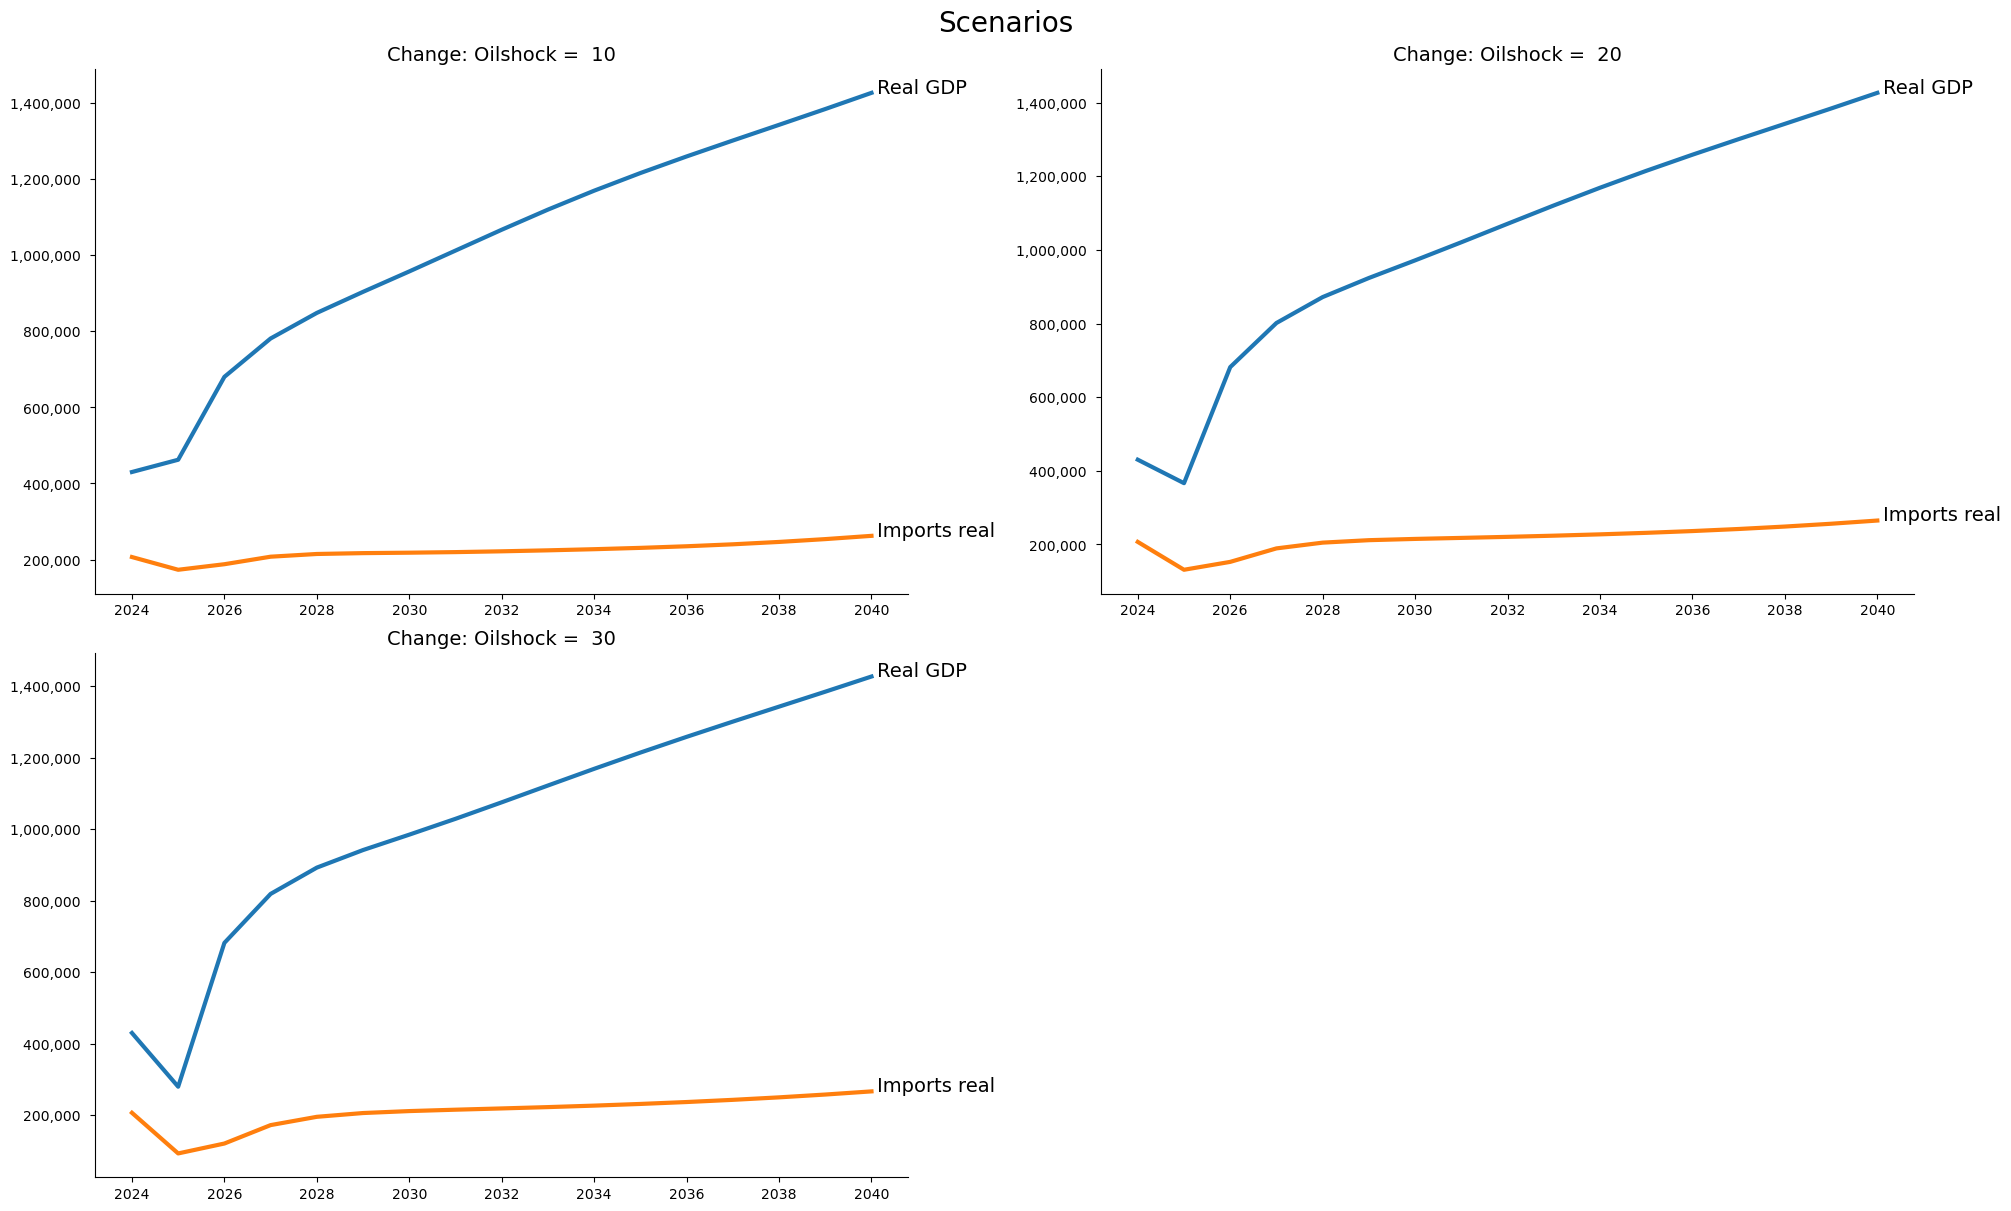

In [12]:
for showtype in ('level', 'growth', 'change'):
    mpak.keep_plot('PAKNYGDPMKTPKN PAKNEIMPGNFSKN',showtype=showtype,
                   keep_dim = False,samefig=True)

### `legend`, If True, displays a legend. Else to the right of he line. Defaults to False.
#### legend=True when samefig=False

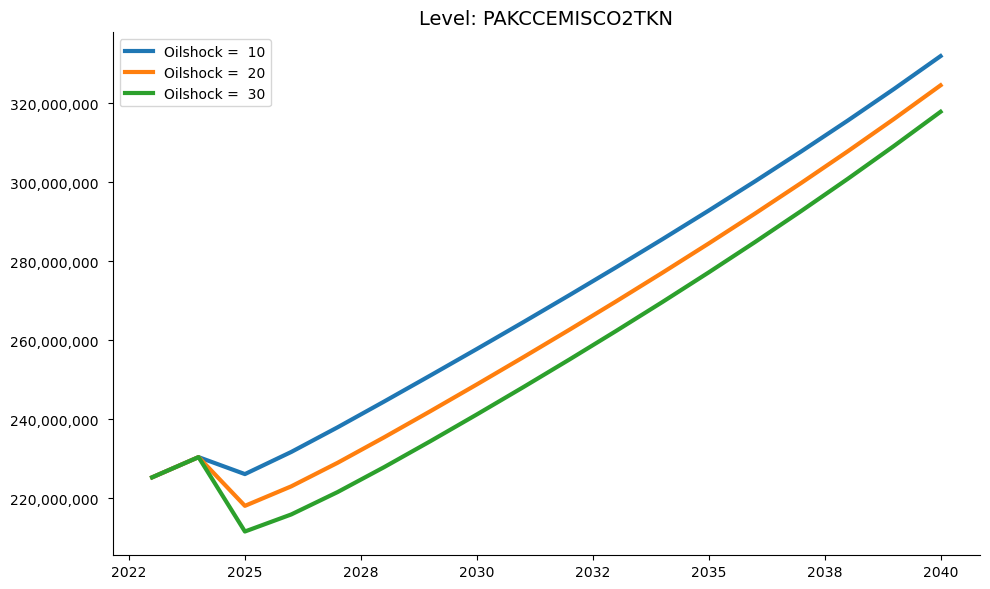

In [13]:
figs = mpak.keep_plot('PAKCCEMISCO2TKN',legend=1);

#### legend=True when samefig=True

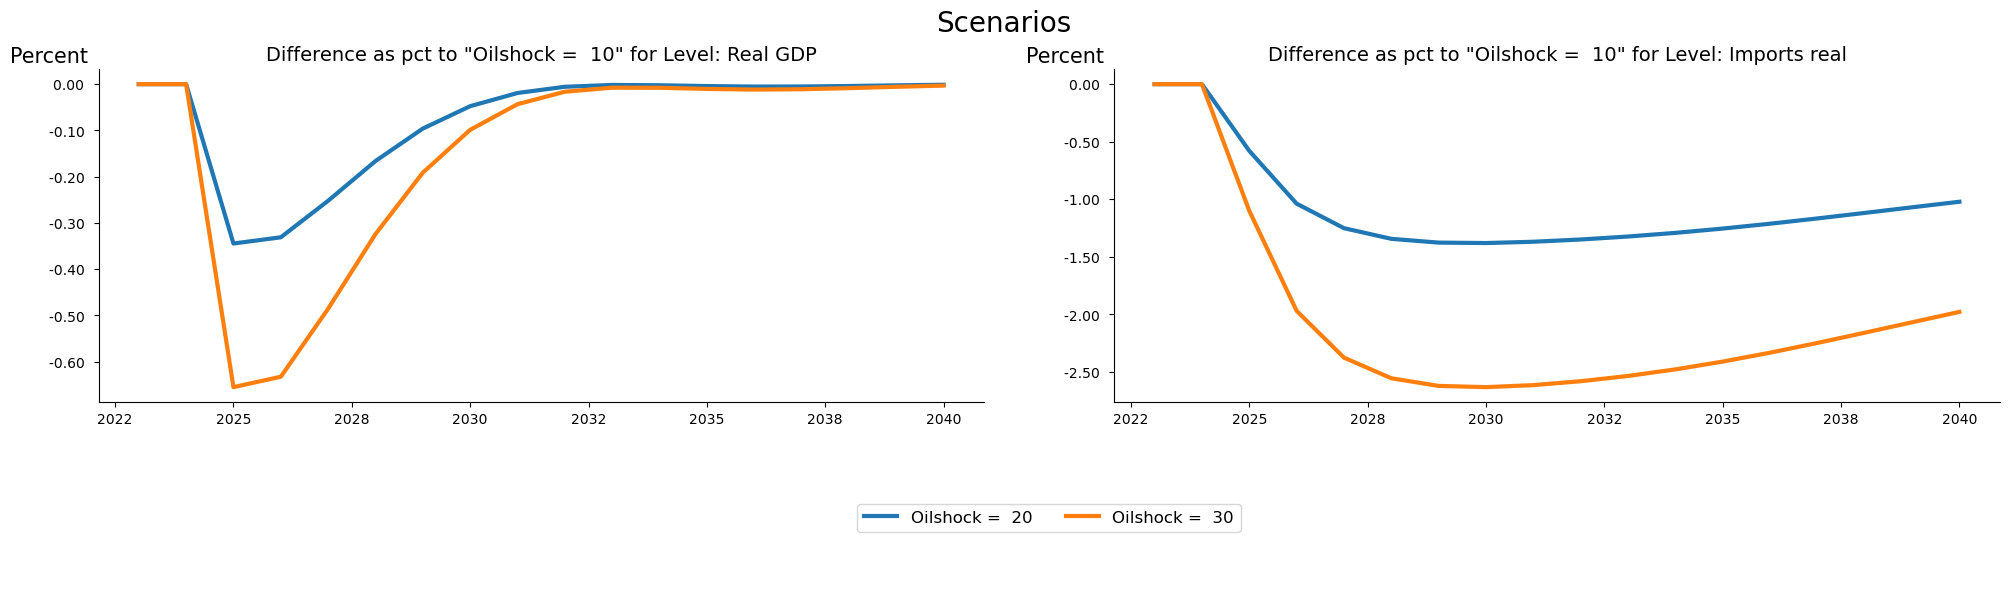

In [14]:
 mpak.keep_plot('PAKNYGDPMKTPKN PAKNEIMPGNFSKN',diffpct=True,
                   keep_dim = True,samefig=True,legend=1);

## Options to the keep_plot/df_plot functions. 
The functions give the user quite a lot of control. Below is a list of all the parameters which can be used. 


| Argument     | Type   | Description                                                                                        | Default    |
|:--------------|--------|:----------------------------------------------------------------------------------------------------|------------|
| `pat`        | str    | Pattern to select variables for plotting.                                                          | '*'        |
| `showtype`   | str    | Type of data transformation for plotting ('level', 'growth', 'change').                            | 'level'    |
| `keep_dim`   | bool   | If True, each line represents a scenario, else each line represents a variable.                    | True       |
| `diff`       | bool   | If True, shows the difference relative to the first experiment.                                    | False      |
| `diffpct`    | bool   | If True, shows the percentage difference relative to the first experiment.                         | False      |
| `samefig`    | bool   | If True, all plots are displayed in the same figure.                                               | False      |
| `ncol`       | int    | Number of columns for subplots when using samefig.                                                 | 2          |
| `legend`     | bool   | If True, displays a legend.                                                                        | False      |
| `kind`       | str    | Type of plot ('line', 'bar', etc.).                                                                | 'line'     |
| `size`       | tuple  | Figure size as (width, height).                                                                    | (10, 6)    |
|||
| `start`      | str    | Start period for the plot.                                                                         | ''         |
| `end`        | str    | End period for the plot.                                                                           | ''         |
| `start_ofset`| int    | Offset to shift the start period, relative to current.                                             | 0          |
| `end_ofset`  | int    | Offset to shift the end period, relative to current.                                               | 0          |
| `mul`        | float  | Multiplier to scale the data.                                                                      | 1.0        |
| `title`      | str    | Title of the plot.                                                                                 | 'Scenarios'|
| `scale`      | str    | Y-axis scale ('linear' or 'log').                                                                  | 'linear'   |
| `yunit`      | str    | Units for the Y-axis.                                                                              | ''         |
| `ylabel`     | str    | Label for the Y-axis.                                                                              | ''         |
| `dec`        | str    | String format for decimal places. If '' then automatically determined.                            | ''         |
| `trans`      | dict   | Dictionary for translating variable names.                                                         | .var_description|
| `showfig`    | bool   | If True, displays the figure. if {} use .var_description                                           | True       |
| `vline`      | list   | List of tuples (time, text) for vertical lines in the plot. vline is persistent, to reset vline=None                                        | Empty list |
| `dataonly`   | bool   | If True, only the dataframes are returned, no plot is generated.                                   | False      |

**Returns:**
- `dict`: A dictionary of Matplotlib figures, with keys being the variable names and values being the figure objects.

**Raises:**
- `ZeroDivisionError`: If no kept solution is available for plotting.


### Save plots as files. 
The `.savefigs` function is used to save the plots for publication or other later use: 

| Parameter       | Type   | Default    | Description |
|-----------------|--------|------------|-------------|
| figs            | dict   | -          | A dictionary of matplotlib figures where the key is the figure name. |
| location        | str    | './graph'  | The base folder in which to save the charts. |
| experimentname  | str    | 'experiment1' | A subfolder under 'location' where charts are saved. |
| addname         | str    | ''         | An additional name added to each figure filename. |
| extensions      | list   | ['svg']    | A list of string file extensions for saving the figures. |
| xopen           | bool   | True       | If True, open the saved figure locations in a web browser. |


In [15]:
mpak.savefigs(figs,extensions=['pdf','png'],xopen=True)

'c:\\modelflow manual\\papers\\mfbook\\content\\07_MoreFeatures\\graph\\experiment1'

### `keep_show/df_show` two gui wrappes of `keep_plot/df_plot`
These functions gives the user the option to design charts throgh point and click. 

In [16]:
mpak.df_show()

### Modify a figure 
´.keep_plot/.df_plot´ returns a dictionary of matplotlib figures. Above the 
variable figs waw created. Lets look at it: 

:::{note}
Matplotlib is a very rich framework with a lot of possibilities. It can require some experience to use it to its full potential
:::

In [17]:
figs.keys()

dict_keys(['PAKCCEMISCO2TKN'])

Now create a variable with the figure which is to be modified:

In [18]:
fig = figs['PAKCCEMISCO2TKN']

A figuere can contain several axes - charts. This only contains one

In [19]:
fig.axes

[<Axes: title={'center': 'Level: PAKCCEMISCO2TKN'}>]

#### make a copy of the figure

In [20]:
import copy
modified_fig = copy.deepcopy(fig)

#### modify the chart

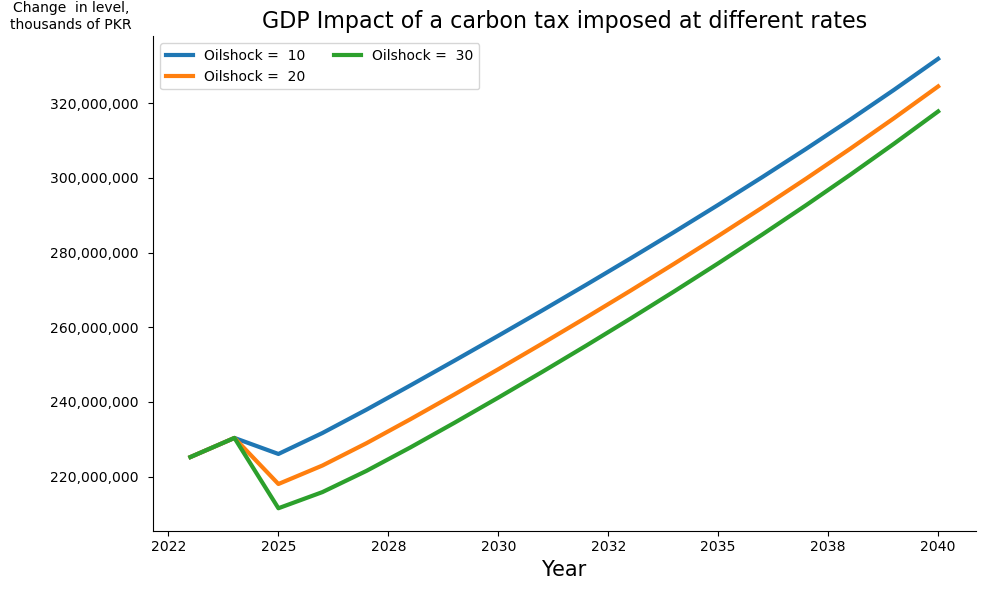

In [21]:
ax = modified_fig.axes[0] 
ax.set_title('GDP Impact of a carbon tax imposed at different rates',fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Change  in level,\nthousands of PKR',fontsize=10)
ax.yaxis.set_label_coords(-0.1,1.02)
ax.legend(ncol=2)
modified_fig


#### modify the yaxis tick labels

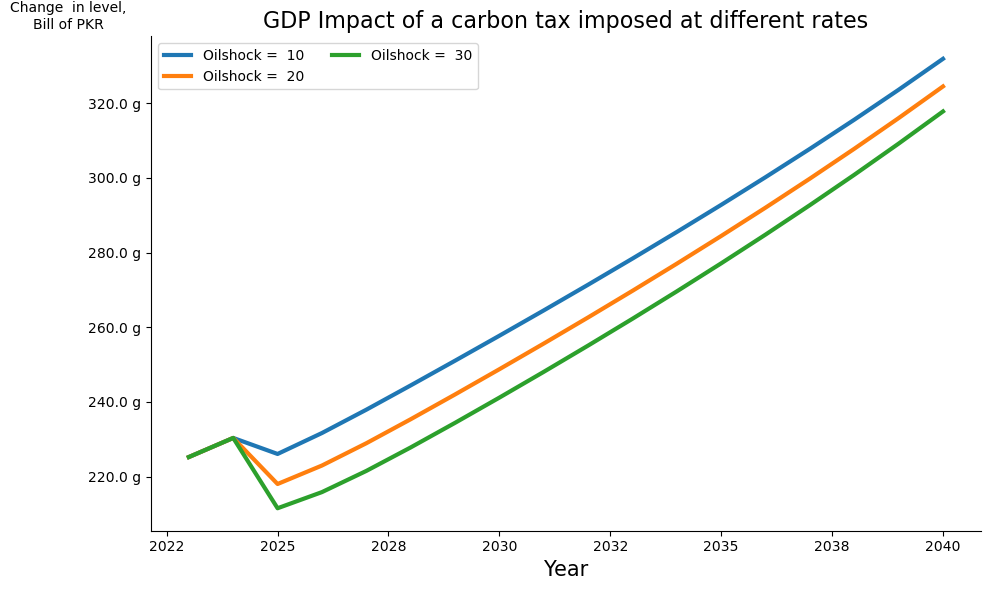

In [22]:
modified_fig_yaxis = copy.deepcopy(modified_fig)

from matplotlib.ticker import FuncFormatter

# Function to format the y-axis labels
def format_yaxis(x, pos):
    return f'{x / 1000_000} g'


ax = modified_fig_yaxis.axes[0] 
# Set the y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))

ax.set_ylabel('Change  in level,\nBill of PKR',fontsize=10)
ax.yaxis.set_label_coords(-0.1,1.02)


modified_fig_yaxis


## Plot four separate plots of multiple series in grid 
To make bespoken plots use the basic matplotlib methods on top of the 
modelflow result dataframes. An example below. 

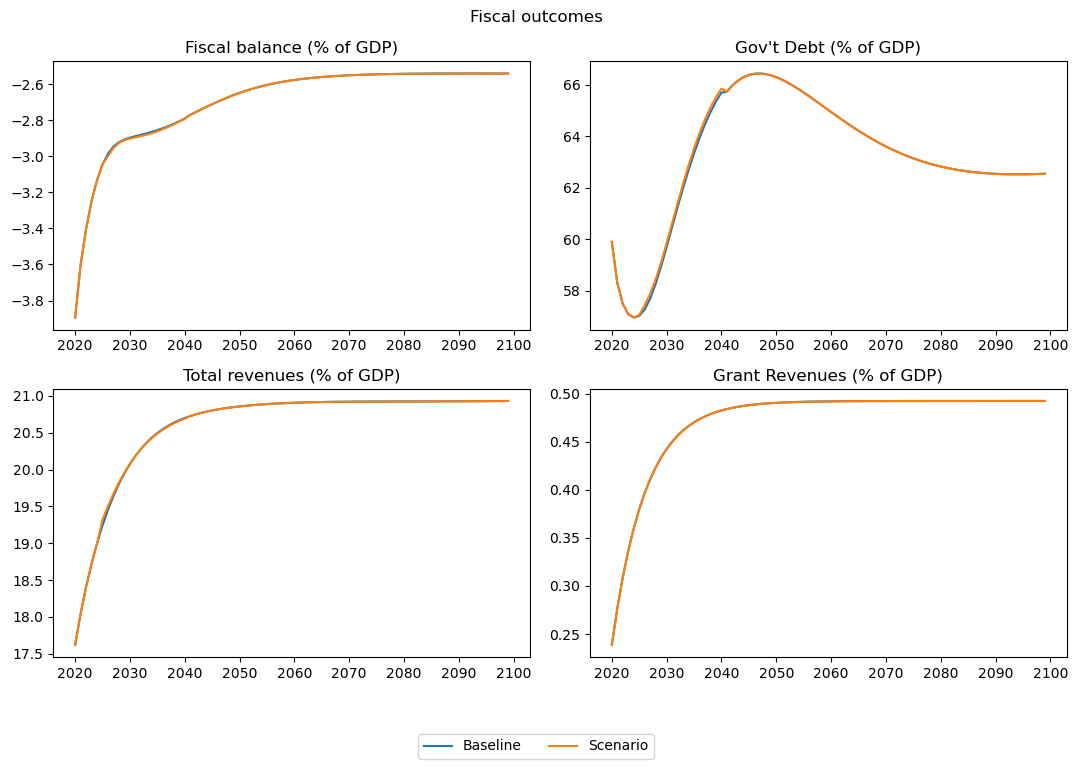

In [27]:
figure, axs = plt.subplots(2, 2, figsize=(11, 7))
figure.subplots_adjust(bottom=0.2)  # Adjust the bottom

axs[0, 0].plot(mpak.basedf.loc['2020':'2099', 'PAKGGBALOVRLCN_'], label='Baseline')
axs[0, 0].plot(mpak.lastdf.loc['2020':'2099', 'PAKGGBALOVRLCN_'], label='Scenario')

axs[0, 1].plot(mpak.basedf.loc['2020':'2099', 'PAKGGDBTTOTLCN_'], label='Baseline')
axs[0, 1].plot(mpak.lastdf.loc['2020':'2099', 'PAKGGDBTTOTLCN_'], label='Scenario')

axs[1, 0].plot(mpak.basedf.loc['2020':'2099', 'PAKGGREVTOTLCN']/mpak.basedf.loc['2020':'2099', 'PAKNYGDPMKTPCN']*100, label='Baseline')
axs[1, 0].plot(mpak.lastdf.loc['2020':'2099', 'PAKGGREVTOTLCN']/mpak.lastdf.loc['2020':'2099', 'PAKNYGDPMKTPCN']*100, label='Scenario')

axs[1, 1].plot(mpak.basedf.loc['2020':'2099', 'PAKGGREVGRNTCN']/mpak.basedf.loc['2020':'2099', 'PAKNYGDPMKTPCN']*100, label='Baseline')
axs[1, 1].plot(mpak.lastdf.loc['2020':'2099', 'PAKGGREVGRNTCN']/mpak.lastdf.loc['2020':'2099', 'PAKNYGDPMKTPCN']*100, label='Scenario')

axs[0, 0].title.set_text("Fiscal balance (% of GDP)")
axs[0, 1].title.set_text("Gov't Debt (% of GDP)")
axs[1, 0].title.set_text("Total revenues (% of GDP)")
axs[1, 1].title.set_text("Grant Revenues (% of GDP)")
figure.suptitle("Fiscal outcomes")

# Place the legend below the subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
figure.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1))

figure ; 


## Use plotly, another graphic library for python 
The above graph can also be made using plotly. By asking ChatGPT 4 with the above as input an the code below was produced. Be sure to look careful of the results.

In [32]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


filtered_base = mpak.basedf.loc['2020':'2099']
filtered_last = mpak.lastdf.loc['2020':'2099']

# Create 2x2 subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=("Fiscal balance (% of GDP)", 
                                                    "Gov't Debt (% of GDP)", 
                                                    "Total revenues (% of GDP)", 
                                                    "Grant Revenues (% of GDP)"))

# Adding traces to respective subplots
fig.add_trace(go.Scatter(x=filtered_base.index, y=filtered_base['PAKGGBALOVRLCN_'], name='Baseline'), row=1, col=1)
fig.add_trace(go.Scatter(x=filtered_last.index, y=filtered_last['PAKGGBALOVRLCN_'], name='Scenario'), row=1, col=1)

fig.add_trace(go.Scatter(x=filtered_base.index, y=filtered_base['PAKGGDBTTOTLCN_'], name='Baseline', showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(x=filtered_last.index, y=filtered_last['PAKGGDBTTOTLCN_'], name='Scenario', showlegend=False), row=1, col=2)

fig.add_trace(go.Scatter(x=filtered_base.index, y=filtered_base['PAKGGREVTOTLCN']/filtered_base['PAKNYGDPMKTPCN']*100, name='Baseline', showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=filtered_last.index, y=filtered_last['PAKGGREVTOTLCN']/filtered_last['PAKNYGDPMKTPCN']*100, name='Scenario', showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=filtered_base.index, y=filtered_base['PAKGGREVGRNTCN']/filtered_base['PAKNYGDPMKTPCN']*100, name='Baseline', showlegend=False), row=2, col=2)
fig.add_trace(go.Scatter(x=filtered_last.index, y=filtered_last['PAKGGREVGRNTCN']/filtered_last['PAKNYGDPMKTPCN']*100, name='Scenario', showlegend=False), row=2, col=2)

# Update layout for legend
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5))

# Update layout for the title
fig.update_layout(title_text="Fiscal outcomes")

fig.show()


In [42]:
%time mpak.modeldump2('test/ibstestnozip',zip_file = False)

CPU times: total: 31.2 ms
Wall time: 41.5 ms


In [40]:
%time mpak.modeldump2('test/ibstestzip',zip_file = True)

CPU times: total: 375 ms
Wall time: 435 ms


In [70]:
%time x,y = model.modelload('test/ibstestnozip')

file read:  C:\modelflow manual\papers\mfbook\content\07_MoreFeatures\test\ibstestnozip.pcim
CPU times: total: 312 ms
Wall time: 357 ms
